In [67]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import fft
from PIL import Image

In [92]:
def img_convolve(pattern, img, shift=False):
    img_fft = fft.fft2(img)
    pattern_fft = fft.fft2(pattern[::-1, ::-1], s=img.shape)
    if shift:
        img_fft = np.fft.fftshift(img_fft)

    return np.abs(fft.ifft2(img_fft * pattern_fft))

def color_invert(img):
    return img*(-1) + 255

def open_grayscale(img):
    img = Image.open(img).convert('L')
    return np.array(img)

def normalize(array):
    return 255 * (array / np.max(array))


In [93]:
def letter_recognition(pattern_name, img_name, eps=0.9, save_name=""):

    img = open_grayscale(img_name)
    img = color_invert(img)

    print("Wykres wartości fazy")
    plt.imshow(normalize(np.angle(np.fft.fft2(img))), cmap='gray')
    plt.show()

    print("Wykres wartości modułu")
    plt.imshow(np.log(np.abs(np.fft.fft2(img))), cmap='gray')
    plt.show()

    pattern = open_grayscale(pattern_name)
    pattern = color_invert(pattern)

    convolution = img_convolve(pattern, img)
    max_correlation = np.max(convolution)



    new_img = Image.open(img_name).convert('RGB')
    new_array = np.array(new_img)
    a, b = pattern.shape
    red = (255, 0, 0)

    count = 0
    for i, j in zip(*np.where(convolution > eps * max_correlation)):
        new_array[i:i-a:-1, j] = red
        new_array[i:i-a:-1, j - b] = red
        new_array[i, j:j-b:-1] = red
        new_array[i - a, j:j-b:-1] = red
        count += 1

    print(f"Znalezionych wystąpień wzorca: {count}")
    final_output = Image.fromarray(new_array)
    display(final_output)
    if save_name:
        final_output.save(save_name)


Wykres wartości fazy


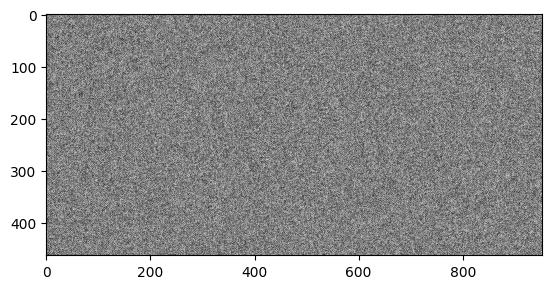

Wykres wartości modułu


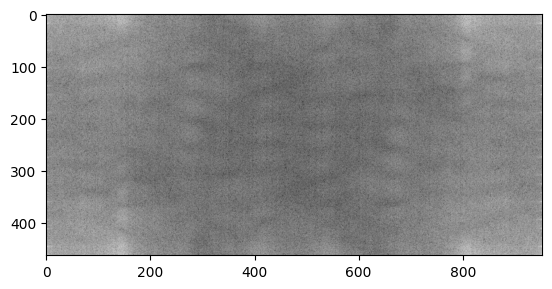

Znalezionych wystąpień wzorca: 43


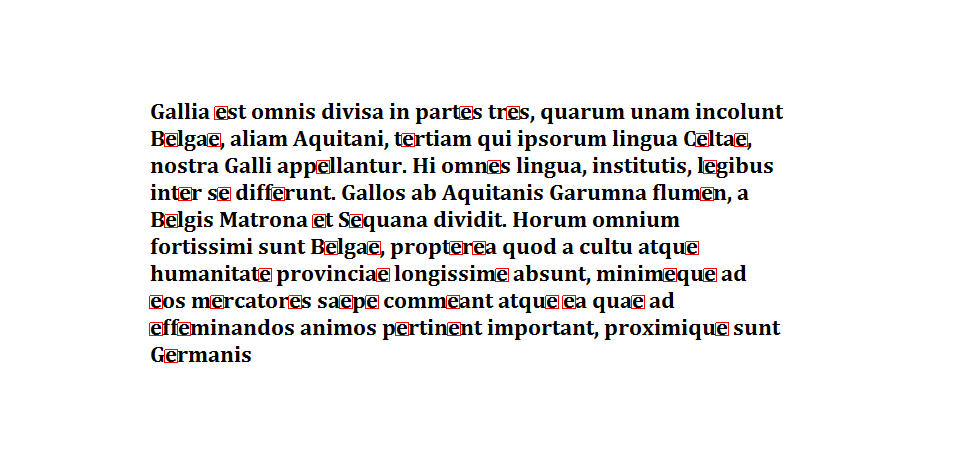

In [94]:
letter_recognition('galia_e.png', 'galia.png', save_name='letter_e.png')

In [99]:

def remove_duplicates(occur, shape_p, shape_c, scale_x=1, scale_y=1):
    x, y = shape_p[0]*scale_x, shape_p[1]*scale_y

    occur.sort(key=lambda point: (-point[0], -point[1]))
    marked = np.zeros(shape_c)
    filtered = []
    for i, j in occur:
        if marked[i, j] == 0:
            filtered.append((i, j))
            marked[i:i-x:-1, j+y:j-y:-1] = 1

    return filtered

def fish_recognition(pattern_name, img_name, eps=0.6, save_name=""):

    img = open_grayscale(img_name)

    print("Wykres wartości fazy")
    plt.imshow(normalize(np.angle(np.fft.fft2(img))), cmap='gray')
    plt.show()

    print("Wykres wartości modułu")
    plt.imshow(np.log(np.abs(np.fft.fft2(img))), cmap='gray')
    plt.show()

    pattern = open_grayscale(pattern_name)

    convolution = img_convolve(pattern, img, shift=True)
    max_correlation = np.max(convolution)

    new_img = Image.open(img_name).convert('RGB')
    new_array = np.array(new_img)
    red = (255, 0, 0)

    count = 0
    for i, j in remove_duplicates(list(zip(*np.where(convolution > eps * max_correlation))), pattern.shape, convolution.shape):
        new_array[i:i-5:-1, j:j-5:-1] = red
        count += 1

    print(f"Znalezionych wystąpień wzorca: {count}")
    final_output = Image.fromarray(new_array)
    display(final_output)
    if save_name:
        final_output.save(save_name)

Wykres wartości fazy


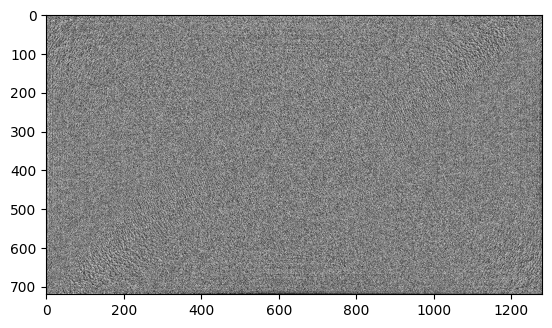

Wykres wartości modułu


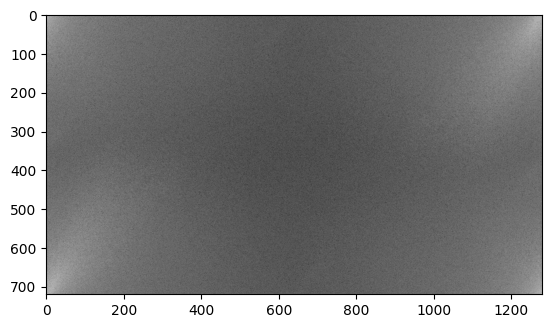

Znalezionych wystąpień wzorca: 47


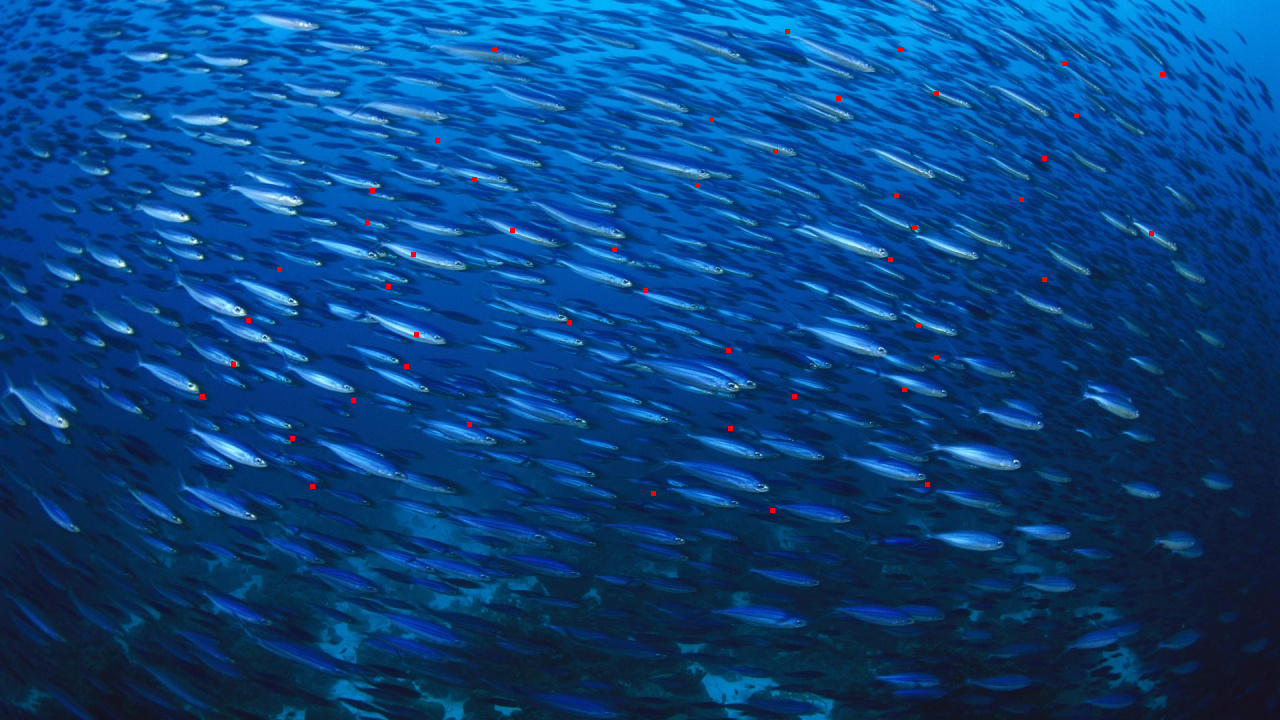

In [101]:
fish_recognition('fish.jpg', 'school.jpg', save_name='found_some_fish.png')